In [1]:
# ! conda install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia
import numpy as np
# import torch 
import matplotlib.pyplot as plt

### $ 根据热力学的原理，在温度为T时，出现能量差为dE的降温的概率为P(dE)，表示为：$
# $ P(dE) = exp( dE/(k*T) ) $
### $ 其中k是一个常数，exp表示自然指数，且dE<0(温度总是降低的)。这条公式指明了 $

# 待优化函数

In [2]:
def f(x=1): #待最小函数
    return np.random.randn(100000)[x]
f()

1.1609909118350992

In [50]:
X = np.random.randn(10000).reshape(10,1000)
Y = np.random.randn(10000).reshape(10,1000)
def minkowski(x, y, p ):
    return np.sum(np.abs(x - y) ** p) ** (1 / p)

In [41]:
for i in range(1,10):
    print(minkowski(X,Y,i))

11311.15671667349
141.78587854153113
35.701185834256705
18.659733121694963
12.953188804844567
10.317228960456648
8.865770077946802
7.97467678722712
7.386071506726287


# 退火算法

In [42]:
def PDE(DE,t,k=1):
    return np.exp((DE)/(k*t))

In [43]:
def DE_function(new,old):
    return new - old

In [44]:
def jump(DE,T,k=1):
    return PDE(DE,T,k) > np.random.rand() and 0 or 1# 

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def f(x=1): #待优化最小函数
    return np.random.randn(100000)[x]

def minkowski(x, y, p ):
    return np.sum(np.abs(x - y) ** p) ** (1 / p)

def PDE(DE,t,k=1):
    return np.exp((DE)/(k*t))

def DE_function(new,old):
    return new - old

def jump(DE,T,k=1):
    return PDE(DE,T,k) > np.random.rand() and 0 or 1# 

def simulated_annealing(X,Y,ps,parameter={"T":1,"T_min":0,"r":0.0001,"expr":0,"jump_max":np.inf}):
    path , funcpath = [] ,[]

    T = parameter["T"] #系统温度，初时应在高温
    T_min = parameter["T_min"] #最小温度值
    r = parameter["r"] #降温速率
    counter = 0
    expr = parameter["expr"] #假设初解
    jump_max = parameter["jump_max"] # 最大冷却值
    jump_counter = 0

    for p in ps:
        if T > T_min and T != 1:
            print(1)
            return expr,path,funcpath
        counter += 1
        new_expr = minkowski(X,Y,p) #新解
        print(f"minkowski:{new_expr}")
        funcpath.append(new_expr)
        DE = new_expr - expr 
        print(f"DE:{DE},\nexpr:{expr}")
        if DE <= 0:
            expr = new_expr
            jump_counter = 0
        elif DE > 0:
            expr = expr
            Jump = jump(DE,T)
            print(f'Jump:{Jump}')
            if Jump:
                T *= r
                print(f'T:{T}')
                jump_counter += 1  
                if jump_counter > jump_max:
                    print("最大回炉冷却次数:",jump_counter)
                    return expr,path,funcpath
        path.append(expr)
        print("{}{}{}{}{}{}{}{}".format('系统温度:',T,' 新状态:',expr,' 迭代轮次:',counter,' DE:',DE))
        
    return expr,path,funcpath
expr,path,funcpath = simulated_annealing(X,Y,np.linspace(1,20,1000),parameter={"T":1,"T_min":0,"r":0.0001,"expr":0,"jump_max":10})
expr,path,funcpath

minkowski:11303.213267061306
DE:11303.213267061306,
expr:0
Jump:1
T:0.0001
系统温度:0.0001 新状态:0 迭代轮次:1 DE:11303.213267061306
1


/tmp/ipykernel_873598/1510873920.py:11: RuntimeWarning: overflow encountered in exp
  return np.exp((DE)/(k*t))


(0, [0], [11303.213267061306])

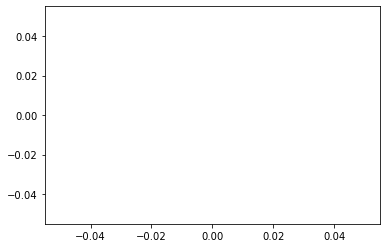

In [35]:
plt.plot(path,c='g')
plt.plot(funcpath,c='r')

系统温度:1 新状态:-0.4056534803734411 迭代轮次:1 DE:-0.4056534803734411
系统温度:0.00011 新状态:-0.4056534803734411 迭代轮次:2 DE:2.2044707941292314
系统温度:1.21e-08 新状态:-0.4056534803734411 迭代轮次:3 DE:0.8392037070822498
系统温度:1.21e-08 新状态:-1.3729394809998543 迭代轮次:4 DE:-0.9672860006264132
系统温度:1.331e-12 新状态:-1.3729394809998543 迭代轮次:5 DE:0.8063436862194687
系统温度:1.331e-12 新状态:-1.4756811970488721 迭代轮次:6 DE:-0.10274171604901783
系统温度:1.4641000000000002e-16 新状态:-1.4756811970488721 迭代轮次:7 DE:3.0833305235878496
系统温度:1.6105100000000003e-20 新状态:-1.4756811970488721 迭代轮次:8 DE:1.569965582062771
系统温度:1.7715610000000002e-24 新状态:-1.4756811970488721 迭代轮次:9 DE:1.4255401719941927
系统温度:1.9487171000000004e-28 新状态:-1.4756811970488721 迭代轮次:10 DE:1.495672176464312
系统温度:2.1435888100000004e-32 新状态:-1.4756811970488721 迭代轮次:11 DE:1.42867689551287
系统温度:2.3579476910000004e-36 新状态:-1.4756811970488721 迭代轮次:12 DE:0.8618287980107476
系统温度:2.5937424601000004e-40 新状态:-1.4756811970488721 迭代轮次:13 DE:0.5867476545382226
系统温度:2.8531167061100007e-44 新状态:-

/tmp/ipykernel_873598/2396042261.py:22: RuntimeWarning: overflow encountered in exp
  return np.exp((DE) / (k * t))


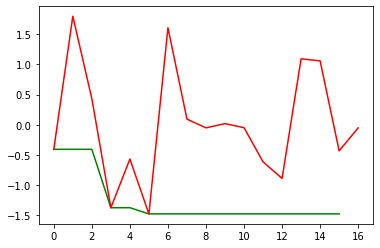

In [55]:
# -*- encoding: utf-8 -*-
'''
@File    :   simulate_anneal.py
@Time    :   2020/10/28 12:45:28
@Author  :   DataMagician 
@Version :   1.0
@Contact :   408903228@qq.com
'''

# here put the import lib

import numpy as np
import matplotlib.pyplot as plt

# ### $ 根据热力学的原理，在温度为T时，出现能量差为dE的降温的概率为P(dE)，表示为：$
# # $ P(dE) = exp( dE/(k*T) ) $
# ### $ 其中k是一个常数，exp表示自然指数，且dE<0(温度总是降低的)。这条公式指明了 $


# # 单变量退火
def PDE(DE, t, k=1):
    return np.exp((DE) / (k * t))


def DE_function(new, old):
    return new - old


def jump(DE, T, k=1):
    return PDE(DE, T, k) > np.random.rand() and 0 or 1


def simulate_anneal(func,
                    parameter={
                        "T": 1,
                        "T_min": 0,
                        "r": 0.0001,
                        "expr": 0,
                        "jump_max": np.inf
                    }):
    path, funcpath = [], []
    T = parameter["T"]  # 系统温度，初时应在高温
    T_min = parameter["T_min"]  # 最小温度值
    r = parameter["r"]  # 降温速率
    counter = 0
    expr = parameter["expr"]  # 假设初解
    jump_max = parameter["jump_max"]  # 最大冷却值
    jump_counter = 0
    while T > T_min:
        counter += 1
        new_expr = func.__next__()  # 迭代新解
        funcpath.append(new_expr)
        DE = new_expr - expr # 计算温差
        if DE <= 0:
            expr = new_expr
            jump_counter = 0
        elif DE > 0:
            expr = expr
            if jump(DE, T):
                T *= r # 开始降温
                jump_counter += 1
                if jump_counter > jump_max:
                    print("最大回炉冷却次数:", jump_counter)
                    return expr, path, funcpath
        path.append(expr)
        print("{}{}{}{}{}{}{}{}".format('系统温度:', T, ' 新状态:', expr, ' 迭代轮次:',
                                        counter, ' DE:', DE))

    return expr, path, funcpath


if __name__ == "__main__":

    def f():  # 待优化最小函数
        for x in np.random.randn(1000):
            yield x

    expr, path, funcpath = simulate_anneal(f(),
                                           parameter={
                                               "T": 1,
                                               "T_min": 0,
                                               "r": 0.00011,
                                               "expr": 0,
                                               "jump_max": 10
                                           })
    print(f"优化函数解:{expr}")  # %%
    plt.plot(path, c='g')
    plt.plot(funcpath, c='r')